In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
DATA = Path("../../data")

In [4]:
train_data = pd.read_csv(DATA / "train.csv")
test_data = pd.read_csv(DATA / "test.csv")

In [5]:
del train_data["id"]
del test_data["id"]

In [6]:
null_persent = train_data.isna().mean().sort_values() * 100

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'class'),
  Text(1, 0, 'stem-height'),
  Text(2, 0, 'stem-width'),
  Text(3, 0, 'season'),
  Text(4, 0, 'cap-diameter'),
  Text(5, 0, 'does-bruise-or-bleed'),
  Text(6, 0, 'cap-color'),
  Text(7, 0, 'has-ring'),
  Text(8, 0, 'stem-color'),
  Text(9, 0, 'cap-shape'),
  Text(10, 0, 'habitat'),
  Text(11, 0, 'gill-color'),
  Text(12, 0, 'ring-type'),
  Text(13, 0, 'gill-attachment'),
  Text(14, 0, 'cap-surface'),
  Text(15, 0, 'gill-spacing'),
  Text(16, 0, 'stem-surface'),
  Text(17, 0, 'veil-color'),
  Text(18, 0, 'stem-root'),
  Text(19, 0, 'spore-print-color'),
  Text(20, 0, 'veil-type')])

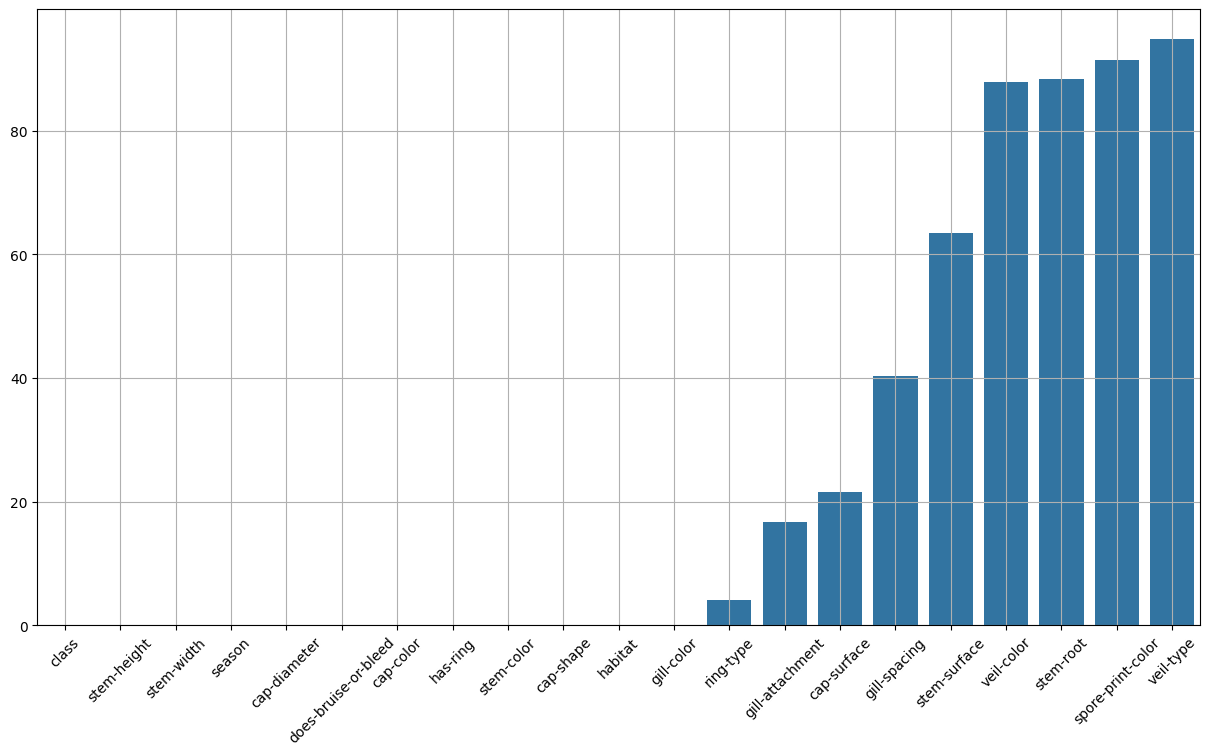

In [7]:
plt.figure(figsize=(15, 8))
sns.barplot(null_persent)
plt.grid(True)
plt.xticks(rotation=45)

In [8]:
train_colunms = null_persent[null_persent < 50].index

In [9]:
train_data = train_data.loc[:, train_colunms]
test_data = test_data.loc[:, train_colunms[1:]]

In [10]:
train_data

,class,stem-height,stem-width,season,cap-diameter,does-bruise-or-bleed,cap-color,has-ring,stem-color,cap-shape,habitat,gill-color,ring-type,gill-attachment,cap-surface,gill-spacing
0,e,4.51,15.39,a,8.80,f,u,f,w,f,d,w,f,a,s,c
1,p,4.79,6.48,w,4.51,f,o,t,o,x,d,n,z,a,h,c
2,e,6.85,9.93,w,6.94,f,b,f,n,f,l,w,f,x,s,c
3,e,4.16,6.53,u,3.88,f,g,f,w,f,d,g,f,s,y,NaN
4,e,3.37,8.36,a,5.85,f,w,f,w,x,g,w,f,d,l,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,12.14,18.81,u,9.29,t,n,t,w,f,d,w,g,NaN,NaN,NaN
3116941,e,6.65,26.97,u,10.88,t,w,f,w,s,d,p,f,d,NaN,c
3116942,p,9.51,11.06,a,7.82,f,e,t,y,x,d,w,z,a,e,NaN
3116943,e,9.13,17.77,u,9.45,t,n,t,w,p,d,p,p,e,i,NaN


In [11]:
test_data

,stem-height,stem-width,season,cap-diameter,does-bruise-or-bleed,cap-color,has-ring,stem-color,cap-shape,habitat,gill-color,ring-type,gill-attachment,cap-surface,gill-spacing
0,11.13,17.12,a,8.64,t,n,t,w,x,d,w,g,NaN,NaN,NaN
1,1.27,10.75,a,6.90,f,o,f,n,o,d,y,f,NaN,t,c
2,6.18,3.14,s,2.00,f,n,f,n,b,d,n,f,NaN,g,c
3,4.98,8.51,u,3.47,f,n,t,w,x,d,n,z,s,t,c
4,6.73,13.70,u,6.17,f,y,t,y,x,d,y,NaN,p,h,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,2.67,1.35,u,0.88,f,w,f,e,x,d,w,f,a,g,d
2077960,2.69,7.38,a,3.12,f,w,f,w,x,g,w,f,d,s,c
2077961,6.16,9.74,a,5.73,f,e,t,y,x,d,w,z,a,e,NaN
2077962,6.00,3.46,a,5.03,f,n,f,g,b,d,g,f,a,g,d


In [12]:
train_data.to_csv(DATA / "train_missing_value_50per_under.csv", index=False)
test_data.to_csv(DATA / "test_missing_value_50per_under.csv", index=False)